# Linear Regression

Linear regression is like drawing a straight line through a bunch of points on a graph. This line helps us predict one thing based on another.

1. **Collect Data**: Imagine you have a list of pairs of numbers. For example, the number of hours you study and the scores you get on tests.

2. **Plot the Data**: Draw these pairs of numbers as points on a graph. The x-axis (horizontal) could be the hours you study, and the y-axis (vertical) could be your test scores.

3. **Draw the Best Line**: Find the straight line that best goes through these points. This line is called the "best-fit line."

4. **Use the Line to Predict**: Once you have this line, you can use it to predict your test score based on how many hours you study.

Linear regression is a way to find a straight line that best represents the relationship between two things, so you can make predictions.

## Tensorflow

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate Data
`.reshape((-1,1))` => tf typically expects data to be in a vertical format,<br>
where each column represents a feature and each row represents a sample.

In [7]:
X = np.array([1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)  # Independent variable (vertical format)
Y = np.array([2, 3, 5, 7, 11], dtype=np.float32).reshape(-1, 1)  # Dependent variable (vertical format)

### Define Variables for Weights and Bias
**`tf.Variable`**:<br>
- Is a TensorFlow class that creates a tensor that can be modified.<br> 
Variables are used to store the state of the model, such as weights and biases, which are updated during training.

**Weights (`W`):**<br>
- `W` represents the weight of the linear model. In a simple linear regression model, the weight is the coefficient that multiplies the input feature.<br>
- `tf.random.normal([1])` initializes the weight with a random value drawn from a normal distribution with a mean of 0 and a standard deviation of 1.<br>
- `[1] `specifies that the weight is a single scalar value.

In [ ]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

Epoch 10: Loss = 70.48414611816406
Epoch 20: Loss = 69.78150939941406
Epoch 30: Loss = 69.08350372314453
Epoch 40: Loss = 68.39046478271484
Epoch 50: Loss = 67.70256042480469
Epoch 60: Loss = 67.0198745727539
Epoch 70: Loss = 66.34242248535156
Epoch 80: Loss = 65.67019653320312
Epoch 90: Loss = 65.00318908691406
Epoch 100: Loss = 64.34135437011719


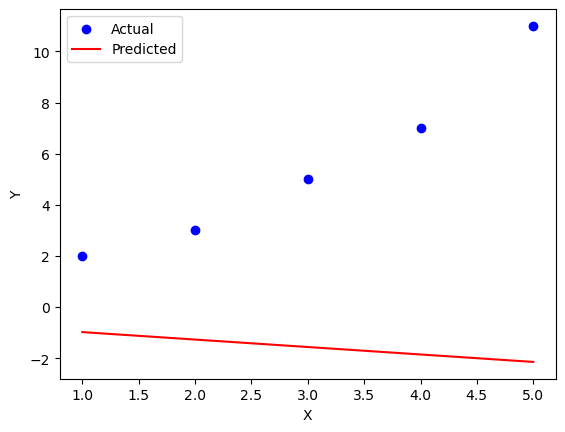

In [5]:






# Define the Linear Model
def linear_model(X):
    return W * X + b

# Define the Loss Function (Mean Squared Error)
def loss_fn(Y_true, Y_pred):
    return tf.reduce_mean(tf.square(Y_true - Y_pred))

# Define the Optimizer
optimizer = tf.optimizers.Adam()

# Training Function
def train_step(X, Y):
    with tf.GradientTape() as tape:
        Y_pred = linear_model(X)
        loss = loss_fn(Y, Y_pred)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss

# Training Loop
epochs = 100
for epoch in range(epochs):
    loss = train_step(X, Y)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.numpy()}")

# Make Predictions
Y_pred = linear_model(X)

# Visualize the Results
plt.scatter(X, Y, color="blue", label="Actual")
plt.plot(X, Y_pred, color="red", label="Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()